In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt
from PIL import Image
import cv2
import matplotlib.image as mpimg
import requests
import os
from selenium.common.exceptions import ElementClickInterceptedException
import time as t
import io
from selenium import webdriver
from pathlib import Path
import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
CUR_DIR = Path.cwd()

In [3]:
chromedriver = CUR_DIR/"chromedriver.exe"

In [5]:
driver = webdriver.Chrome(chromedriver)

C:\Users\User\AppData\Local\Temp/ipykernel_14368/1917609646.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(CUR_DIR)


In [68]:
def scrap_google_img(term):
    search_url="https://www.google.com/search?q={q}&tbm=isch&ved=2ahUKEwjdw7KQuYT3AhXDEmMBHd6yBBEQ2-cCegQIABAA&oq=bouteille+sale+plastique+data&gs_lcp=CgNpbWcQA1DDCFi4I2CyOmgAcAB4AIAB2AGIAbIFkgEFMi4xLjKYAQCgAQGqAQtnd3Mtd2l6LWltZ8ABAQ&sclient=img&ei=tydQYp2MMsOljLsP3uWSiAE&bih=616&biw=1280&client=firefox-b-d#imgrc=H2RxA5VyViusPM" 

    driver.get(search_url.format(q=term))
    for _ in range(10):
        try:
            driver.execute_async_script("window.scrollTo(0, document.body.scrollHeight);}, 2000);")
            t.sleep(0.3)
        except Exception as e:
            print("Error: ",e)
            continue
    imgResults = driver.find_elements_by_xpath("//img[contains(@class,'rg_i Q4LuWd')]")
    return imgResults
    

In [23]:
#Click on each Image to extract its corresponding link to download
def data_img_generator(term):
    imgResults = scrap_google_img(term)
    img_urls = set()
    for i in  range(0,len(imgResults)):
        img=imgResults[i]
        try:
            img.click()
            t.sleep(4)
            actual_images = driver.find_elements_by_css_selector('img.Q4LuWd')
            for actual_image in actual_images:
                if actual_image.get_attribute('src') and 'https' in actual_image.get_attribute('src'):
                    print(actual_image.get_attribute('src'))
                    img_urls.add(actual_image.get_attribute('src'))
    
        except Exception  as err:
            print(err)
    return img_urls

In [24]:
def download_googleImgs(path:Path,term:str) :
    path_sepc = path/"-".join(term.split(" "))
    path_sepc.mkdir(exist_ok=True)
    list_urls = data_img_generator(term)
    files_list = [f for f in path_sepc.iterdir() if (f.is_file()) & (str(f).endswith(".jpg"))]
    print(len(files_list))
    if len(files_list) != 0:
        max_number_file = max([int(f.stem.split("-")[-1])  for f in files_list if (f.is_file()) & (str(f).endswith(".jpg"))])+1
    else:
        max_number_file= 1
    for i, url in enumerate(list_urls):
        print(url)
        file_name = f"{term}-{i+max_number_file}.jpg"    
        try:
            image_content = requests.get(url).content
    
        except Exception as e:
            print(f"ERROR - COULD NOT DOWNLOAD {url} - {e}")
    
        try:
            image_file = io.BytesIO(image_content)
            image = Image.open(image_file).convert('RGB')
            
            file_path = path_sepc/file_name
            
            with open(file_path, 'wb') as f:
                image.save(f, "JPEG", quality=85)
            print(f"SAVED - {url} - AT: {file_path}")
        except Exception as e:
            print(f"ERROR - COULD NOT SAVE {url} - {e}")

In [26]:
"-".join("bouteille plastique sale".split(" "))

'bouteille-plastique-sale'

In [ ]:
list_search = ["dirty plastic cutlery ","clean plastic cutlery",
               ]

In [27]:
def main(list_terms, path_parent):
    for term in list_terms:
        download_googleImgs(path_parent,term)
        t.sleep(300)

In [24]:
test = Path("bouteille-plastique-sale-155.jpg")

In [30]:
"-".join(test.stem.split("-")[:-1])

'bouteille-plastique-sale'

In [10]:
chiffre = test.stem.split("-")[-1]

In [3]:
dataSets = CUR_DIR/"datasets"

In [4]:
bp = dataSets/"train"/"bouteille-propre"

test = CUR_DIR/"test"

In [20]:
fc = [f for f in test.iterdir() if (f.is_file() and str(f).lower().endswith(".jpg"))]

In [ ]:
[f.rename(bp/f"bouteille_propre-{i+828}{f.suffix}") for i,f in enumerate(fc)]

In [22]:
m_num = [int(f.stem.split("-")[-1])  for f in bs.iterdir() if (f.is_file()) & (str(f).endswith(".jpg"))]

In [ ]:
[print(i,f) for i,f in enumerate(bs.iterdir())]

In [10]:
source = dataSets/ "train"/"bouteille-propre"
target =dataSets/"couvert-plastique-propre"
test = 

In [ ]:
[f.stem.split("-")[-1].replace(".","") for f in dataSets.parent.iterdir() if (f.is_file()) & (str(f).endswith(".jpg"))]

In [52]:
def rename_files(path:Path, path_target:Path):
    max_num = max([int(f.stem.split("-")[-1].replace(".",""))  for f in path.iterdir() if (f.is_file()) & (str(f).endswith(".jpg"))])+1
    [f.rename(Path(path_target,f"couvert-plastique-propre-{max_num+i}-{f.suffix}")) for i,f in enumerate(path.iterdir()) if f.is_file()if (f.is_file()) & (str(f).endswith(".jpg"))]


In [4]:
datasets = CUR_DIR/"datasets"
train_path = datasets/"train"
test_path = datasets/"test"

In [5]:
dim1 = []
dim2 = []
for imageifilename in  (train_path/"bouteille-propre").iterdir():
    img = mpimg.imread(str(imageifilename))
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

c:\Users\User\anaconda3\envs\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


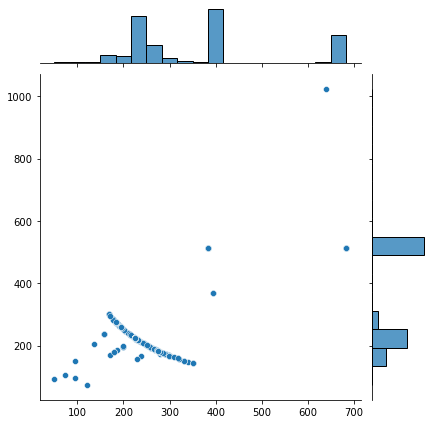

In [6]:
sns.jointplot(dim1,dim2);

In [33]:
np.min(dim1), np.min(dim2)

(50, 74)

In [8]:
image_shape = (300,300,3)

In [9]:
file_img = [f for f in  (train_path/"bouteille-propre").iterdir()]

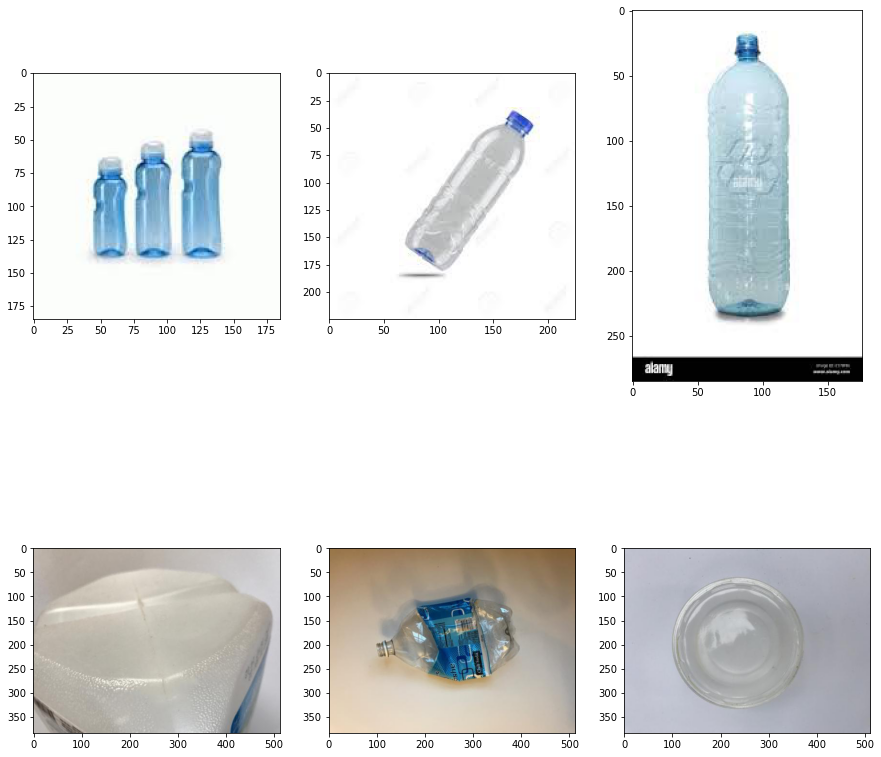

In [10]:
plt.figure(figsize=(15,15))
for i in range(6):
    plt.subplot(2,3,i+1)
    img = mpimg.imread(str(file_img[i]))
    plt.imshow(img)
plt.show()


In [11]:
image_gen = ImageDataGenerator(rotation_range=30, vertical_flip=True,
                                shear_range=0.1, height_shift_range=0.2,
                                width_shift_range=0.2,zoom_range=0.1,
                                fill_mode='nearest',rescale=1/255)

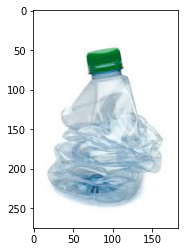

In [12]:
img_cell = mpimg.imread(str(file_img[82]))
plt.imshow(img_cell);

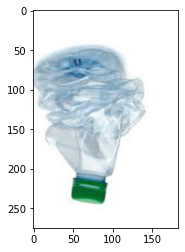

In [13]:
plt.imshow(image_gen.random_transform(img_cell));

In [14]:
image_gen.flow_from_directory(train_path)
image_gen.flow_from_directory(test_path)

Found 2583 images belonging to 6 classes.
Found 843 images belonging to 6 classes.


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [16]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),  activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3),  activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3),  activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3),  activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3),  activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(6,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 145, 145, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 72, 72, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 70, 70, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 68, 68, 128)       1

In [18]:
early_stoping = EarlyStopping(monitor='val_loss',patience=6)

In [19]:
batch_size = 16

In [20]:
train_img_gen =image_gen.flow_from_directory(train_path,
                                                target_size=image_shape[:2], 
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='categorical')

Found 2583 images belonging to 6 classes.


In [21]:
test_img_gen=image_gen.flow_from_directory(test_path,
                                            target_size=image_shape[:2],
                                            color_mode='rgb',
                                            batch_size=batch_size,
                                            class_mode='categorical',
                                            shuffle=False)

Found 843 images belonging to 6 classes.


train_img_gen.class_indices

In [22]:
results = model.fit(train_img_gen,epochs=40,validation_data=test_img_gen,callbacks=[early_stoping])

Epoch 1/40
162/162 [==============================] - 232s 1s/step - loss: 1.5569 - accuracy: 0.3461 - val_loss: 1.5990 - val_accuracy: 0.4057
Epoch 2/40
162/162 [==============================] - 239s 1s/step - loss: 1.4242 - accuracy: 0.4142 - val_loss: 1.5081 - val_accuracy: 0.3986
Epoch 3/40
162/162 [==============================] - 241s 1s/step - loss: 1.3902 - accuracy: 0.4166 - val_loss: 1.4884 - val_accuracy: 0.3974
Epoch 4/40
162/162 [==============================] - 236s 1s/step - loss: 1.3430 - accuracy: 0.4317 - val_loss: 1.4440 - val_accuracy: 0.4164
Epoch 5/40
162/162 [==============================] - 243s 1s/step - loss: 1.2987 - accuracy: 0.4603 - val_loss: 1.4474 - val_accuracy: 0.3998
Epoch 6/40
162/162 [==============================] - 242s 1s/step - loss: 1.2667 - accuracy: 0.4774 - val_loss: 1.3493 - val_accuracy: 0.4638
Epoch 7/40
162/162 [==============================] - 243s 2s/step - loss: 1.2092 - accuracy: 0.5172 - val_loss: 1.3335 - val_accuracy: 0.4698

In [23]:
metrics = pd.DataFrame(results.history)

In [24]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.556947,0.346109,1.599040,0.405694
1,1.424201,0.414247,1.508125,0.398576
2,1.390216,0.416570,1.488450,0.397390
3,1.342956,0.431669,1.443962,0.416370
4,1.298671,0.460317,1.447429,0.399763
5,1.266666,0.477352,1.349321,0.463820
6,1.209157,0.517228,1.333527,0.469751
7,1.201080,0.505226,1.270350,0.478055
8,1.214007,0.508711,1.352853,0.436536
9,1.194237,0.525745,1.328551,0.473310


In [58]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

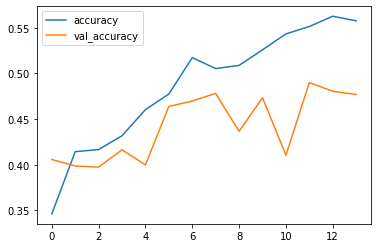

In [25]:
metrics[['accuracy', 'val_accuracy']].plot();

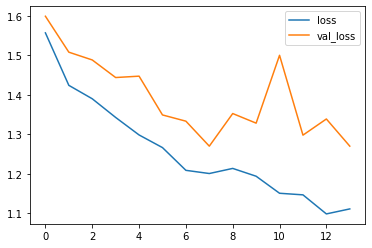

In [26]:
metrics[['loss', 'val_loss']].plot();

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
predictions = np.argmax(model.predict(test_img_gen),axis= 1)

In [30]:
test_img_gen.class_indices

{'bouteille-propre': 0,
 'bouteille-sale': 1,
 'couvert-propre': 2,
 'couvert-sale': 3,
 'goblet-propre': 4,
 'goblet-sale': 5}

In [29]:
print(classification_report(test_img_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.49      0.53      0.51       210
           1       0.38      0.38      0.38        80
           2       0.56      0.21      0.31       105
           3       0.33      0.36      0.34        47
           4       0.58      0.73      0.65       338
           5       0.20      0.05      0.08        63

    accuracy                           0.51       843
   macro avg       0.42      0.38      0.38       843
weighted avg       0.49      0.51      0.49       843



<AxesSubplot:>

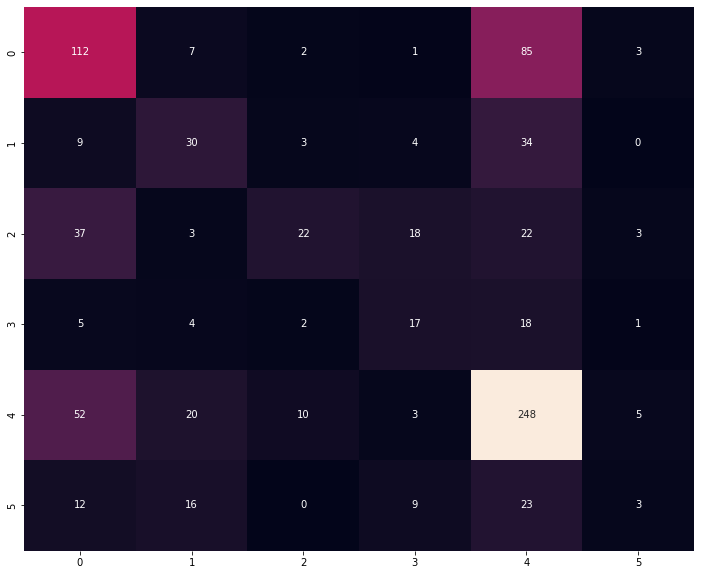

In [30]:
plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(test_img_gen.classes,predictions), annot=True, fmt='d', cbar=False)

In [ ]:
import tensorflow_hub as hub

In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Flatten, Dense, Dropout
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.python.keras.utils.np_utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [6]:
from keras.models import load_model


In [13]:
imag_shape = (250,250,3)

In [34]:
# VGG16 pre-entrainé sans le classifier final
# Déclaration du modèle VGG16 (sans le top qui est le classifier)
vgg16_model = VGG16(pooling='avg', weights='imagenet', include_top=False, input_shape=(250,250,3))

for layers in vgg16_model.layers:
            layers.trainable=False
last_output = vgg16_model.layers[-1].output
vgg_x = Flatten()(last_output)
vgg_x = Dense(128, activation = 'relu')(vgg_x)
vgg_x = Dense(6, activation = 'softmax')(vgg_x)
vgg16_final_model = Model(vgg16_model.input, vgg_x)
vgg16_final_model.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics=['acc'])

# VGG16
number_of_epochs = 60
vgg16_filepath = 'vgg_16_'+'saved-model-{epoch:02d}-acc-{val_acc:.2f}.hdf5'
vgg_checkpoint = ModelCheckpoint(vgg16_filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
vgg_early_stopping = EarlyStopping(monitor='loss', patience=5)

vgg16_history = vgg16_final_model.fit(train_img_gen, epochs = number_of_epochs ,validation_data = test_img_gen,callbacks=[vgg_checkpoint,vgg_early_stopping],verbose=1)





Epoch 1/60
162/162 [==============================] - ETA: 0s - loss: 1.2024 - acc: 0.5679
Epoch 00001: val_acc improved from -inf to 0.60142, saving model to vgg_16_-saved-model-01-acc-0.60.hdf5
162/162 [==============================] - 393s 2s/step - loss: 1.2024 - acc: 0.5679 - val_loss: 1.1335 - val_acc: 0.6014
Epoch 2/60
162/162 [==============================] - ETA: 0s - loss: 0.8535 - acc: 0.7089
Epoch 00002: val_acc improved from 0.60142 to 0.67260, saving model to vgg_16_-saved-model-02-acc-0.67.hdf5
162/162 [==============================] - 391s 2s/step - loss: 0.8535 - acc: 0.7089 - val_loss: 0.9226 - val_acc: 0.6726
Epoch 3/60
162/162 [==============================] - ETA: 0s - loss: 0.7363 - acc: 0.7484
Epoch 00003: val_acc improved from 0.67260 to 0.70700, saving model to vgg_16_-saved-model-03-acc-0.71.hdf5
162/162 [==============================] - 395s 2s/step - loss: 0.7363 - acc: 0.7484 - val_loss: 0.8190 - val_acc: 0.7070
Epoch 4/60
162/162 [====================

In [47]:
metric_vgg16= pd.DataFrame(vgg16_history.history)

In [55]:
metric_vgg16['acc'].max()

0.9128919839859009

In [50]:
metric_vgg16.columns

Index(['loss', 'acc', 'val_loss', 'val_acc'], dtype='object')

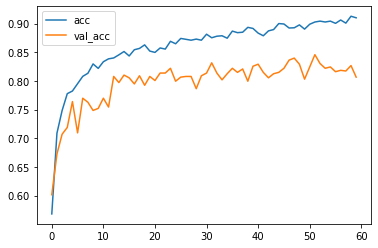

In [51]:
metric_vgg16[['acc', 'val_acc']].plot();

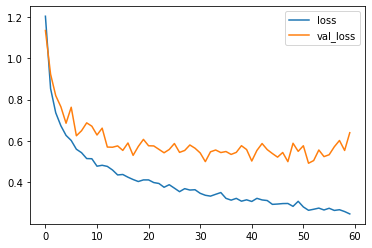

In [52]:
metric_vgg16[['loss', 'val_loss']].plot();

In [23]:
vgg16 = load_model("vgg_16_-saved-model-52-acc-0.85.hdf5")

In [62]:
vgg16.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 250, 250, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 250, 250, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 250, 250, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 125, 125, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 125, 125, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 125, 125, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 62, 62, 128)      

In [42]:
predictions = np.argmax(vgg16.predict(test_img_gen),axis= 1)

In [43]:
print(classification_report(test_img_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       210
           1       0.74      0.65      0.69        80
           2       0.88      0.94      0.91       105
           3       0.78      0.77      0.77        47
           4       0.94      0.91      0.92       338
           5       0.56      0.57      0.57        63

    accuracy                           0.85       843
   macro avg       0.79      0.79      0.79       843
weighted avg       0.85      0.85      0.85       843



<AxesSubplot:>

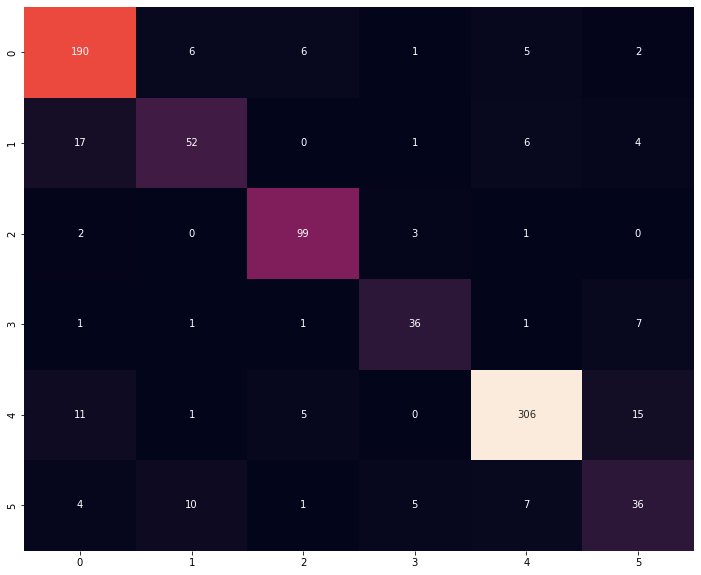

In [44]:
plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(test_img_gen.classes,predictions), annot=True, fmt='d', cbar=False)

In [21]:
path_img = Path(r"datasets\test\goblet-sale\goblet_sale-210.jpg")

In [10]:
from tensorflow.keras.preprocessing import image

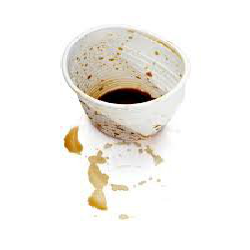

In [18]:
my_img = image.load_img(path_img, target_size=imag_shape)
my_img

In [32]:
def class_predict(path_image,model_cnn, image_shape):
    #model_cnn = load_model(path_model_cnn)
    my_img = image.load_img(path_image, target_size=image_shape)
    img_array = np.expand_dims(my_img,axis=0)/255
    max_acc = model_cnn.predict(img_array).max()*100
    rest = np.argmax((model_cnn.predict(img_array) > 0.5).astype('int32'))
    switch={
        0:"bouteille-propre",
        1:"bouteille-sale",
        2:"couvert-propre",
        3:"couvert-sale",
        4:"goblet-propre",
        5:"goblet-sale"
    }
    return switch.get(rest),f'{max_acc:.02f} %'


In [33]:
class_predict(path_img,vgg16,imag_shape)

('goblet-sale', '99.66 %')

In [77]:
train_img_gen.class_indices

{'bouteille-propre': 0,
 'bouteille-sale': 1,
 'couvert-propre': 2,
 'couvert-sale': 3,
 'goblet-propre': 4,
 'goblet-sale': 5}

### ``Code Louis``

In [10]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import requests
import shutil
import os
import sys
import argparse
from binascii import a2b_base64
from tqdm import tqdm

def parse_arguments():
    parser = argparse.ArgumentParser(description='Un petit scraper pour Google Image')
    parser.add_argument('type',
                        help='type of object to search for, this will be used as the directory name and as a name stem for image storage')
    parser.add_argument('search',
                        help='Google search for which you want to get the images')
    parser.add_argument('-n', '--number', type=int, default=10,
                        help='Number of images you want to store')
    parser.add_argument('-d', '--directory', default='scraped_images',
                        help='The parent directory in which to store the files, images will be stored in a subdirectory named after the type parameter')
    
    args = parser.parse_args()

    return args.type, args.search, args.number, args.directory

In [11]:
def scrap_imgs(obj_type, search, number=10, directory='scraped_images'):

    print("Connection et recherche google:\n...")
    opts = webdriver.FirefoxOptions()
    opts.add_argument("--headless")
    driver = webdriver.Firefox(options=opts)

    store_dir = os.path.join(directory, obj_type)

    if not os.path.exists(directory):
        os.makedirs(directory)

    if not os.path.exists(store_dir):
        os.makedirs(store_dir)
        i_max=0
    else:
        i_max = max(map(lambda name : int(name.split('_')[1].split('.')[0]),
                    os.listdir('scraped_images/dirty')))

    url = f'https://www.google.com/search?q={search}&source=lnms&tbm=isch&sa=X&ved=2ahUKEwie44_AnqLpAhUhBWMBHUFGD90Q_AUoAXoECBUQAw&biw=1920&bih=947'

    driver.get(url)
    #on scroll pour pouvoir scraper plus d'images
    print("Scrolling de la page de résultats de Google Image:")
    for _ in tqdm(range(10)):
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight-1000);")
        time.sleep(0.5)

In [12]:
print("Récupération des images:")
cpt=0
flag=False
for i in tqdm(range(100)):
    img_src = driver.find_element(By.XPATH, '//div//div//div//div//div//div//div//div//div//div['+str(i+1)+']//a[1]//div[1]//img[1]').get_attribute("src")
    filename = f'/{obj_type}_{i_max+i+1}.jpg'
    if img_src is None:
        cpt+=1
        flag=True
    else:
        if img_src[:10] == 'data:image':
            data = img_src.split(',')[1]
            binary_data = a2b_base64(data)
            with open(store_dir + filename, 'wb') as f:
                f.write(binary_data)
        
        elif img_src[:4] == 'http':
                response = requests.get(img_src,stream=True)
                with open(store_dir + filename, 'wb') as f:
                    shutil.copyfileobj(response.raw, f)
    
    if flag:
        print(f"*** !! ATTENTION !! ***\n{cpt} image(s) n'a(ont) pas pu être scrappée(s)")

def main():
    args = parse_arguments()
    scrap_imgs(*args)

if __name__ == "__main__":
    main()

Récupération des images:


  0%|          | 0/100 [00:00<?, ?it/s]


NameError: name 'obj_type' is not defined